# Install libraries

In [1]:
# !pip install scapy

In [2]:
!pip install dpkt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 181 kB 5.4 MB/s 


# Import libraries

In [8]:
# from scapy.all import *
import dpkt
from PIL import Image
import binascii
import dpkt
from datetime import datetime, timedelta, timezone
import pytz

In [24]:
import pandas as pd
import numpy as np
from scipy.fftpack import ifft, idct
from sklearn.preprocessing import MinMaxScaler
from typing import *
import os

# Utils

In [14]:
# def linear_transformation(sample: Union[np.ndarray, list], size=tuple) -> Image:
#   if type(sample) == list:
#     sample = np.array(sample)
#   sample_pixel_range = sample  # * 255
#   sample_pixel_range_reshaped = sample_pixel_range.reshape(size)
#   image = Image.fromarray(obj=sample_pixel_range_reshaped.astype(np.uint8), 
#                           mode='L')
#   image_resized = image.resize((224, 224))
#   rgb_image = image_resized.convert('RGB')
#   return rgb_image

def linear_transformation(sample: Union[np.ndarray, list], size=tuple) -> Image:
  if type(sample) == list:
    sample = np.array(sample)
  sample_pixel_range = sample  # * 255
  sample_pixel_range_reshaped = sample_pixel_range.reshape(size)
  image = Image.fromarray(obj=sample_pixel_range_reshaped.astype(np.uint8), 
                          mode='L')
  # image_resized = image.resize((224, 224))
  rgb_image = image.convert('RGB')
  return rgb_image

In [15]:
def diagonal_transformation(sample: Union[np.ndarray, list], size=tuple) -> Image:
  if type(sample) == list:
    sample = np.array(sample)
  sample_pixel_range = sample  # * 255
  
  matrix = np.zeros(size)
  for r in range(min(size)):
    for i, j in zip(range(r, -1, -1), range(r+1)):
      matrix[i, j] = sample_pixel_range[0]
      sample_pixel_range = sample_pixel_range[1:]

  image = Image.fromarray(obj=matrix.astype(np.uint8), 
                          mode='L')
  image_resized = image.resize((224, 224))
  rgb_image = image_resized.convert('RGB')
  return rgb_image

In [16]:
def diagonal_transformation_with_idct(sample: Union[np.ndarray, list], size=tuple) -> Image:
  if type(sample) == list:
    sample = np.array(sample)
  sample_pixel_range = sample  # * 255
  
  matrix = np.zeros(size)
  for r in range(min(size)):
    for i, j in zip(range(r, -1, -1), range(r+1)):
      matrix[i, j] = sample_pixel_range[0]
      sample_pixel_range = sample_pixel_range[1:]

  image = Image.fromarray(obj=idct(matrix).astype(np.uint8), 
                          mode='L')
  image_resized = image.resize((224, 224))
  rgb_image = image_resized.convert('RGB')
  return rgb_image

In [17]:
def spiral_transformation(sample: Union[np.ndarray, list], size=tuple) -> Image:
  if type(sample) == list:
    sample = np.array(sample)
  if size[0] == size[1] and size[0] % 2 == 1:
    sample_pixel_range = sample  # * 255

    matrix = np.zeros(size)
    moves = ((0, -1), (1, 0), (0, 1), (-1, 0))
    moves_length = [1, 1, 1, 1]
    center = size[0] // 2
    i, j = center, center
    matrix[i, j] = sample_pixel_range[0]
    sample_pixel_range = sample_pixel_range[1:]
    move_id = 0
    while True:
      for c in range(moves_length[move_id]):
        if len(sample_pixel_range) < 1:
          break
        i += moves[move_id][0]
        j += moves[move_id][1]
        matrix[i, j] = sample_pixel_range[0]
        sample_pixel_range = sample_pixel_range[1:]

      if move_id == 0 or move_id == 2:
        moves_length[0] += 1
        moves_length[2] += 1
      else:
        moves_length[1] += 1
        moves_length[3] += 1
      
      move_id += 1
      if move_id == 4:
        move_id = 0

      if moves_length[0] == size[0] or moves_length[1] == size[0] or moves_length[2] == size[0] or moves_length[3] == size[0]:
        break
      
    image = Image.fromarray(obj=matrix.astype(np.uint8), 
                            mode='L')
    image_resized = image.resize((224, 224))
    rgb_image = image_resized.convert('RGB')
    return rgb_image

# Connect to Google Drive (if needed)

In [18]:
# Подключить к google colab содержимое вашего google диск
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset logs

\begin{array}{ll}
\hline
Time & Event                                                                                    \\ \hline
1005 & Capture\; pre-attack\; pcap\; for\; 15\; mins                                                      \\ \hline
1020 & Capture\; pcap\; for\; actual\; attack\; in\; 15\; mins\;   intervals                                    \\ \hline
1020 & Infiltrate\; SCADA\; WS\; via\; USB\; thumb\; drive\; with\; first\; malware                             \\ \hline
1030 & First\; attack:\; Exfiltrate\; Historian\; Data\; (5\; mins\; attack\; + 10\; mins\; sleep)\; x\; 4\; cycles     \\ \hline
1030 & Exfiltrate\; Historian\; Data                                                                \\ \hline
1035 & Sleep                                                                                    \\ \hline
1045 & Exfiltrate\; Historian\; Data                                                               \\ \hline
1050 & Sleep                                                                                    \\ \hline
1100 & Exfiltrate\; Historian\; Data                                                                \\ \hline
1105 & Sleep                                                                                    \\ \hline
1115 & Exfiltrate\; Historian\; Data                                                                \\ \hline
1120 & Sleep                                                                                    \\ \hline
1130 & Rest\; 60\; mins                                                                             \\ \hline
1230 & Infiltrate\; SCADA\; WS\; with\; second\; malware,\; via\; downloading\; from\; C2\; server                \\ \hline
1230 & Second\; attack:\; Disrupt\; sensor\; readings\; and\; process\; (3\; mins\; +\; 10\; mins\; sleep)\; x\; 5\; cycles \\ \hline
1230 & Disrupt\; Sensor\; and\; Actuator                                                              \\ \hline
1233 & Sleep                                                                                    \\ \hline
1243 & Disrupt\; Sensor\; and\; Actuator                                                              \\ \hline
1246 & Sleep                                \\ \hline
1256 & Disrupt\; Sensor\; and\; Actuator                                                              \\ \hline
1259 & Sleep                                                                                    \\ \hline
1309 & Disrupt\; Sensor\; and\; Actuator                                                              \\ \hline
1312 & Sleep                                                                                    \\ \hline
1322 & Disrupt\; Sensor\; and\; Actuator                                                              \\ \hline
1325 & Sleep\; (5\; mins)                                                                           \\ \hline
1330 & Stop\; actual\; attack\; pcap\; capture                                                          \\ \hline
1330 & Capture\; post-attack\; pcap\; for\; 15\; mins                                                     \\ \hline
1345 & Stop\; post\; attack\; pcap\; capture                                                            \\ \hline
1345 & RAM\; memory\; dump\; using\; FTKImager,\; extract\;   when\; done                                     \\ \hline
1345 & Extract\; Historian\; .csv\; files                                                             \\ \hline
1345 & Extract\; malware\; .exe\; file\; for\; both\;   attacks                                             \\ \hline
1345 & Extract\; VM\; image\; (.vmdk)\; of\; both\; SCADA\; WS\;   and\; C2\; server                                \\ \hline
1345 & Extract\; capture\; pcap\; files\; from\; external\;   monitoring\; VM                                 \\ \hline                         
\end{array}

# Attack detection

In [19]:
def attack_detector(ts: float) -> str:
  UTC_OFFSET = 8
  if ts >= (datetime(2019, 12, 6, 10, 30, 0) - timedelta(hours=UTC_OFFSET)).timestamp() and ts < (datetime(2019, 12, 6, 10, 35, 0) - timedelta(hours=UTC_OFFSET)).timestamp():
    return 1  # 'exf_hist_data'
  elif ts >= (datetime(2019, 12, 6, 10, 45, 0) - timedelta(hours=UTC_OFFSET)).timestamp() and ts < (datetime(2019, 12, 6, 10, 50, 0) - timedelta(hours=UTC_OFFSET)).timestamp():
    return 1  # 'exf_hist_data'
  elif ts >= (datetime(2019, 12, 6, 11, 0, 0) - timedelta(hours=UTC_OFFSET)).timestamp() and ts < (datetime(2019, 12, 6, 11, 5, 0) - timedelta(hours=UTC_OFFSET)).timestamp():
    return 1  # 'exf_hist_data'
  elif ts >= (datetime(2019, 12, 6, 11, 15, 0) - timedelta(hours=UTC_OFFSET)).timestamp() and ts < (datetime(2019, 12, 6, 11, 20, 0) - timedelta(hours=UTC_OFFSET)).timestamp():
    return 1  # 'exf_hist_data'
  elif ts >= (datetime(2019, 12, 6, 12, 30, 0) - timedelta(hours=UTC_OFFSET)).timestamp() and ts < (datetime(2019, 12, 6, 12, 33, 0) - timedelta(hours=UTC_OFFSET)).timestamp():
    return 2  # 'disr_sens_act'
  elif ts >= (datetime(2019, 12, 6, 12, 43, 0) - timedelta(hours=UTC_OFFSET)).timestamp() and ts < (datetime(2019, 12, 6, 12, 46, 0) - timedelta(hours=UTC_OFFSET)).timestamp():
    return 2  # 'disr_sens_act'
  elif ts >= (datetime(2019, 12, 6, 12, 56, 0) - timedelta(hours=UTC_OFFSET)).timestamp() and ts < (datetime(2019, 12, 6, 12, 59, 0) - timedelta(hours=UTC_OFFSET)).timestamp():
    return 2  # 'disr_sens_act'
  elif ts >= (datetime(2019, 12, 6, 13, 9, 0) - timedelta(hours=UTC_OFFSET)).timestamp() and ts < (datetime(2019, 12, 6, 13, 12, 0) - timedelta(hours=UTC_OFFSET)).timestamp():
    return 2  # 'disr_sens_act'
  elif ts >= (datetime(2019, 12, 6, 13, 22, 0) - timedelta(hours=UTC_OFFSET)).timestamp() and ts < (datetime(2019, 12, 6, 13, 25, 0) - timedelta(hours=UTC_OFFSET)).timestamp():
    return 2  # 'disr_sens_act'
  else:
    return 0  # 'normal'

In [20]:
def attack_detector_aggr(min_ts: float, max_ts: float) -> str:
  type_min_ts = attack_detector(min_ts)
  type_max_ts = attack_detector(max_ts)
  if type_min_ts == 0 and type_min_ts == 0:
    return 0
  else:
    if type_min_ts == type_min_ts:
      return type_min_ts
    else:
      return None

# Download dataset (no need for this step)

In [ ]:
# sh = """
# DOWNLOAD_PATH="/content/SWaT_Dec2019"
# echo Start downloading ...
# gdown --folder https://drive.google.com/drive/folders/139-57nr8Xuroa3ztOuz9ZR4I3uPgkW7l -O ${DOWNLOAD_PATH}
# echo Download end
# if [[ ! $((ls ${DOWNLOAD_PATH}) | wc -l) -eq 0 ]];
# then
#   echo Start reformat files ...
#   for filename in ${DOWNLOAD_PATH}/*;
#   do
#     # echo ${filename}
#     if [[ ! "${filename}" == *.pcap ]] && [[ ! "${filename}" == *.txt ]];
#     then
#       # echo ${filename}
#       mv ${filename} ${filename}.pcap;
#     fi
#   echo Reformat end
#   done
# else
#   echo 'DOWNLOAD FILES FROM LOCAL PC OR FROM YOUR GDRIVE (empty directory)'
# fi
# echo Done
# """
# with open('script.sh', 'w') as file:
#   file.write(sh)

# !bash script.sh

# Try to read .pcap file in full

In [ ]:
# %%time
# packets = rdpcap("/content/drive/MyDrive/Master/MW/datasets/SWaT/SWaT_2019/network_traffic/Dec2019_00000_20191206100500.pcap")
# packets.summary()

# RAM error, File size = 2,67GB, more than 15 minutes ...

In [ ]:
# %%time
# packets = rdpcap("/content/drive/MyDrive/Master/MW/datasets/SWaT/SWaT_2019/network_traffic/Dec2019_00001_20191206102207.pcap")
# packets.summary()

# RAM error, File size = 1,39GB, more than 15 minutes ...

# Try to read .pcap file sequentially

In [ ]:
%%time
counter=0
ipcounter=0
tcpcounter=0
udpcounter=0

filename='/content/drive/MyDrive/Master/MW/datasets/SWaT/SWaT_2019/network_traffic/Dec2019_00001_20191206102207.pcap'

for ts, pkt in dpkt.pcap.Reader(open(filename,'rb')):
  counter += 1
  eth = dpkt.ethernet.Ethernet(pkt) 
  if eth.type != dpkt.ethernet.ETH_TYPE_IP:
      continue

  ip = eth.data
  ipcounter += 1

  if ip.p == dpkt.ip.IP_PROTO_TCP: 
      tcpcounter += 1

  if ip.p == dpkt.ip.IP_PROTO_UDP:
      udpcounter += 1

print("Total number of packets in the pcap file: ", counter)
print("Total number of ip packets: ", ipcounter)
print("Total number of tcp packets: ", tcpcounter)
print("Total number of udp packets: ", udpcounter)

Total number of packets in the pcap file:  11557020
Total number of ip packets:  5776443
Total number of tcp packets:  4802339
Total number of udp packets:  973465
CPU times: user 5min 58s, sys: 1.73 s, total: 5min 59s
Wall time: 6min 3s


# Statistics about .pcap files

In [ ]:
SWaT_directory = '/content/drive/MyDrive/Master/MW/datasets/SWaT/SWaT_2019/pcap'

In [ ]:
%%time
counter_all = 0
ipcounter_all = 0
tcpcounter_all = 0
udpcounter_all = 0
shape_list_all = list()
count_packets_interval_all = list()
normal_counter_all = 0
exf_hist_data_counter_all = 0
disr_sens_act_counter_all = 0
for filename in os.listdir(SWaT_directory):
  if filename.endswith('.txt'):  # or not filename.endswith('.pcap'):
    continue
  counter = 0
  ipcounter = 0
  tcpcounter = 0
  udpcounter = 0
  time_list = list()
  max_value_list = list()
  shape_list = list()
  counter_interval = 0
  count_packets_interval = list()
  normal_counter = 0
  exf_hist_data_counter = 0
  disr_sens_act_counter = 0

  print('Processing %s start ...' % filename)
  temp_ts_interval = np.inf
  with open(os.path.join(SWaT_directory, filename),'rb') as pcap_file:
    for ts, pkt in dpkt.pcap.Reader(pcap_file):
      counter += 1
      counter_interval += 1
      eth = dpkt.ethernet.Ethernet(pkt) 
      if eth.type == dpkt.ethernet.ETH_TYPE_IP:
        ip = eth.data
        ipcounter += 1

        if ip.p == dpkt.ip.IP_PROTO_TCP: 
            tcpcounter += 1

        if ip.p == dpkt.ip.IP_PROTO_UDP:
            udpcounter += 1

      status = attack_detector(ts=ts)
      if status == 'normal':
        normal_counter += 1
      elif status == 'exf_hist_data':
        exf_hist_data_counter += 1
      elif status == 'disr_sens_act':
        disr_sens_act_counter += 1
            
      temp_list = np.frombuffer(pkt, dtype=np.uint8)

      UTC_OFFSET = 8
      dt_object = datetime.fromtimestamp(ts) + timedelta(hours=UTC_OFFSET)

      time_list.append(dt_object)
      max_value_list.append(max(temp_list))
      shape_list.append(len(temp_list))

      if ts < temp_ts_interval:
        temp_ts_interval = ts
      else:
        if ts - temp_ts_interval > 0.05:
          count_packets_interval.append(counter_interval)
          counter_interval = 0
          temp_ts_interval = np.inf

    counter_all += counter
    ipcounter_all += ipcounter
    tcpcounter_all += tcpcounter
    udpcounter_all += udpcounter
    normal_counter_all += normal_counter
    exf_hist_data_counter_all += exf_hist_data_counter
    disr_sens_act_counter_all += disr_sens_act_counter

    shape_list_all.append(shape_list)
    count_packets_interval_all.append(count_packets_interval)

    print("Total number of packets in the pcap file: %s" % counter)
    print("Total number of ip packets: %s" % ipcounter)
    print("Total number of tcp packets: %s" % tcpcounter)
    print("Total number of udp packets: %s\n" % udpcounter)

    print("Total number of normal packets: %s, percentage: %s" % (normal_counter, round(normal_counter / counter * 100, 2)))
    print("Total number of packets attacked 'Exfiltrate Historian Data': %s, percentage: %s" % (exf_hist_data_counter, round(exf_hist_data_counter / counter * 100, 2)))
    print("Total number of packets attacked 'Disrupt Sensor and Actuator': %s, percentage: %s\n" % (disr_sens_act_counter, round(disr_sens_act_counter / counter * 100, 2)))

    print('Start time: %s' % np.min(time_list))
    print('End time: %s\n' % np.max(time_list))

    print('Min packet length: %s' % np.min(shape_list))
    print('Max packet length: %s' % np.max(shape_list))
    print('Mean packet length: %s' % np.mean(shape_list))
    print('99 percentile packet length: %s' % np.percentile(shape_list, 99))
    print('90 percentile packet length: %s\n' % np.percentile(shape_list, 90))

    print('Min highest value: %s' % np.min(max_value_list))
    print('Max highest value: %s\n' % np.max(max_value_list))

    print('Seconds count: %s' % int((np.max(time_list) - np.min(time_list)).total_seconds()))
    print('Mean packets count in second: %s\n' % (counter / int((np.max(time_list) - np.min(time_list)).total_seconds())))

    print('Min packets count in 0.05 seconds: %s' % np.min(count_packets_interval))
    print('Max packets count in 0.05 seconds: %s' % np.max(count_packets_interval))
    print('Mean packets count in 0.05 seconds: %s' % np.mean(count_packets_interval))
    print('99 percentile packets count in 0.05 seconds: %s' % np.percentile(count_packets_interval, 99))
    print('90 percentile packets count in 0.05 seconds: %s\n' % np.percentile(count_packets_interval, 90))

    print('Processing %s end' % filename)

    print('\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n')

print('General statistics:')
print("Total number of packets: %s" % counter_all)
print("Total number of ip packets: %s" % ipcounter_all)
print("Total number of tcp packets: %s" % tcpcounter_all)
print("Total number of udp packets: %s\n" % udpcounter_all)

print("Total number of normal packets: %s, percentage: %s" % (normal_counter_all, round(normal_counter_all / counter_all * 100, 2)))
print("Total number of packets attacked 'Exfiltrate Historian Data': %s, percentage: %s" % (exf_hist_data_counter_all, round(exf_hist_data_counter_all / counter_all * 100, 2)))
print("Total number of packets attacked 'Disrupt Sensor and Actuator': %s, percentage: %s\n" % (disr_sens_act_counter_all, round(disr_sens_act_counter_all / counter_all * 100, 2)))

print('Min packet length: %s' % np.min(shape_list_all))
print('Max packet length: %s' % np.max(shape_list_all))
print('Mean packet length: %s' % np.mean(shape_list_all))
print('99 percentile packet length: %s' % np.percentile(shape_list_all, 99))
print('90 percentile packet length: %s\n' % np.percentile(shape_list_all, 90))

print('Min packets count in 0.05 seconds: %s' % np.min(count_packets_interval_all))
print('Max packets count in 0.05 seconds: %s' % np.max(count_packets_interval_all))
print('Mean packets count in 0.05 seconds: %s' % np.mean(count_packets_interval_all))
print('99 percentile packets count in 0.05 seconds: %s' % np.percentile(count_packets_interval_all, 99))
print('90 percentile packets count in 0.05 seconds: %s' % np.percentile(count_packets_interval_all, 90))

Processing Dec2019_00000_20191206100500.pcap start ...
Total number of packets in the pcap file: 22024317
Total number of ip packets: 11007837
Total number of tcp packets: 9155132
Total number of udp packets: 1851492

Total number of normal packets: 22024317, percentage: 100.0
Total number of packets attacked 'Exfiltrate Historian Data': 0, percentage: 0.0
Total number of packets attacked 'Disrupt Sensor and Actuator': 0, percentage: 0.0

Start time: 2019-12-06 10:05:04.374600
End time: 2019-12-06 10:20:03.389539

Min packet length: 60
Max packet length: 23418
Mean packet length: 114.14412478716139
99 percentile packet length: 633.0
90 percentile packet length: 148.0

Min highest value: 192
Max highest value: 255

Seconds count: 899
Mean packets count in second: 24498.684093437154

Min packets count in 0.05 seconds: 868
Max packets count in 0.05 seconds: 4656
Mean packets count in 0.05 seconds: 1229.4300547058167
99 percentile packets count in 0.05 seconds: 2077.0099999999766
90 percen

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you 

# Try to create image from packet data

In [ ]:
# filename = '/content/drive/MyDrive/Master/MW/datasets/SWaT/SWaT_2019/network_traffic/Dec2019_00001_20191206102207.pcap'
filename = '/content/drive/MyDrive/Master/MW/datasets/SWaT/SWaT_2019/pcap/Dec2019_00001_20191206102207'

Linear transformation:


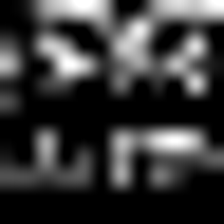

Diagonal transformation:


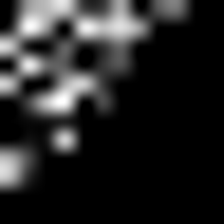

Diagonal transformation (with IDCT):


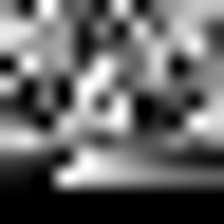

Spiral transformation:


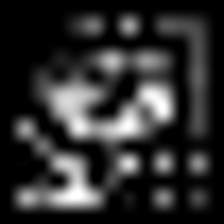


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Linear transformation:


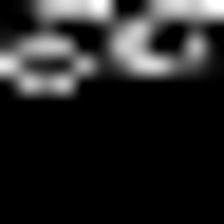

Diagonal transformation:


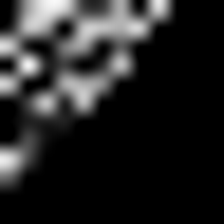

Diagonal transformation (with IDCT):


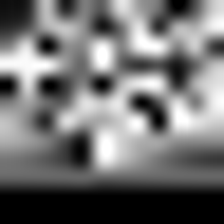

Spiral transformation:


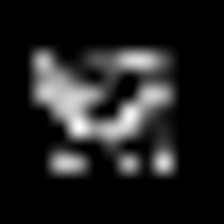


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Linear transformation:


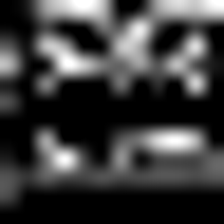

Diagonal transformation:


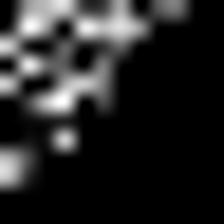

Diagonal transformation (with IDCT):


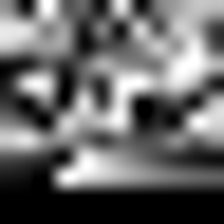

Spiral transformation:


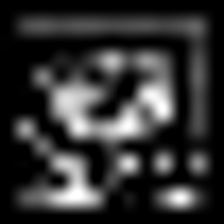


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



In [ ]:
i = 0

for ts, pkt in dpkt.pcap.Reader(open(filename,'rb')):

  eth = dpkt.ethernet.Ethernet(pkt) 
  if eth.type != dpkt.ethernet.ETH_TYPE_IP:
      continue

  ip=eth.data

  temp_list = np.frombuffer(pkt, dtype=np.uint8)

  temp_array = np.zeros(144)
  if len(pkt) < len(temp_array): 
    temp_array[:len(pkt)] = temp_list
  elif len(pkt) > len(temp_array): 
    temp_array = temp_list[:len(temp_array)]
  else:
    temp_array = np.array(temp_list)

  print('Linear transformation:')
  image = linear_transformation(sample=temp_array, size=(12, 12))
  display(image)
  
  print('Diagonal transformation:')
  image = diagonal_transformation(sample=temp_array, size=(12, 12))
  display(image)
  
  print('Diagonal transformation (with IDCT):')
  image = diagonal_transformation_with_idct(sample=temp_array, size=(12, 12))
  display(image)
  
  print('Spiral transformation:')
  image = spiral_transformation(sample=temp_array, size=(13, 13))
  display(image)

  print('\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n')
  i += 1
  if i == 3:
    break

# Try to aggregate packets 

Two approaches to aggregate:
- aggregate one packet to one pixel (apply aggregation function to each packet and then collect them or collect packets and then apply statistic function to rows)
- aggregate through collected packets (collect packets and then apply aggregation function to columns)
- experimental: concat several (e.g. 2, 3, 4) aggregated images (time sequence)


Two approches to choose aggregation packets:
- based on packets count (e.g. aggregate every 1000 packets)
- based on timestamp (e.g. aggregate packets every 0.1 seconds)

In [ ]:
SWaT_directory = '/content/drive/MyDrive/Master/MW_Semenov_6381/datasets/SWaT/SWaT_2019/pcap'

packet_length = 121
packets_count_in_ts_interval = 1225

ts_interval = 0.01
packet_count = 3000

info_features_length = 4

In [ ]:
35*35

1225

## Aggregate through collected packets

### Based on timestamp

In [ ]:
experimental_mode = True
experimental_pcap_filename = 'Dec2019_00004_20191206110000'

output_csv_filename = 'dataset_through_ts.csv'


output_all_count_for_bin_clf_exp = 20000
output_normal_count_for_bin_clf_exp = 12000
output_attack_count_for_bin_clf_exp = 8000
max_packet_length_for_bin_clf_exp = 121

In [ ]:
20000*0.6

12000.0

In [ ]:
%%time
dataset_agg_p_ts = list()  # np.zeros(packet_length + info_features_length)

temp_ts_interval = np.inf
# temp_aggr_array = np.zeros(packet_length)
temp_aggr_array = list()

current_all_output_count = 0
current_normal_output_count = 0
current_attack_output_count = 0

for filename in os.listdir(SWaT_directory):
  # if filename.endswith('.txt'):
  #   continue
  # if not filename.endswith('00001_20191206102207'):
  #   continue
  if filename.endswith('.txt'):
    continue
  if experimental_mode and filename != experimental_pcap_filename:
    continue

  print('%s - Aggregating %s start ...' % (datetime.now(), filename))

  with open(os.path.join(SWaT_directory, filename), 'rb') as pcap_file:
    for ts, pkt in dpkt.pcap.Reader(pcap_file):

      if current_all_output_count >= output_all_count_for_bin_clf_exp: 
        break

      packet_array = np.frombuffer(pkt, dtype=np.uint8)
      temp_array = np.zeros(packet_length)
      if len(packet_array) < len(temp_array): 
        temp_array[:len(packet_array)] = packet_array
      elif len(packet_array) > len(temp_array): 
        temp_array = packet_array[:len(temp_array)]
      else:
        temp_array = np.array(packet_array)

      # temp_aggr_array = np.vstack([temp_aggr_array, temp_array])
      temp_aggr_array.append(temp_array)
      
      if ts < temp_ts_interval:
        temp_ts_interval = ts
      else:
        if ts - temp_ts_interval >= 0.05:
          status = attack_detector_aggr(min_ts=temp_ts_interval, max_ts=ts)
          if status is not None:
            if status == 0:
              if current_normal_output_count >= output_normal_count_for_bin_clf_exp:
                continue
              bin_status = 0
              current_all_output_count += 1  
              current_normal_output_count += 1
            else:
              if current_attack_output_count >= output_attack_count_for_bin_clf_exp:
                continue
              bin_status = 1
              current_all_output_count += 1  
              current_attack_output_count += 1
          temp_aggr_packets_info = [temp_ts_interval, ts, status, bin_status]
          # aggregated_array = np.mean(temp_aggr_array, axis=0)
          # aggregated_array = np.append(aggregated_array, temp_aggr_packets_info)
          aggregated_array = np.mean(temp_aggr_array, axis=0).tolist()
          aggregated_array += temp_aggr_packets_info

          # print(np.array(temp_aggr_array).shape)
          # print(aggregated_array.shape)

          # dataset_agg_p = np.vstack([dataset_agg_p, aggregated_array])
          dataset_agg_p_ts.append(aggregated_array)
          # temp_aggr_array = np.zeros(packet_length)
          temp_aggr_array = list()
          temp_ts_interval = np.inf

  print('%s - Aggregating %s end\n' % (datetime.now(), filename))

# dataset_agg_p = dataset_agg_p[1: , :]
dataset_agg_p_ts = np.array(dataset_agg_p_ts)
np.savetxt(output_csv_filename, dataset_agg_p_ts, delimiter=',')
print(dataset_agg_p_ts.shape)

2022-05-19 00:41:18.750890 - Aggregating Dec2019_00004_20191206110000 start ...
2022-05-19 00:45:34.348001 - Aggregating Dec2019_00004_20191206110000 end

(17943, 328)
CPU times: user 4min 7s, sys: 6.76 s, total: 4min 13s
Wall time: 4min 22s


In [ ]:
!cp dataset_through_ts.csv /content/drive/MyDrive/Master/MW_Semenov_6381/datasets/SWaT/SWaT_2019/aggregated

In [ ]:
test_array = np.loadtxt('/content/drive/MyDrive/Master/MW_Semenov_6381/datasets/SWaT/SWaT_2019/aggregated/dataset_agg_p_ts_experimental.csv', delimiter=',', dtype=np.float64)
test_array.shape

(17943, 328)

## Aggregate one packet to one pixel

### Based on timestamp

In [ ]:
experimental_mode = True
experimental_pcap_filename = 'Dec2019_00004_20191206110000'

output_csv_filename = 'dataset_pp_ts.csv'


output_all_count_for_bin_clf_exp = 20000
output_normal_count_for_bin_clf_exp = 12000
output_attack_count_for_bin_clf_exp = 8000
max_packet_length_for_bin_clf_exp = 121

In [ ]:
%%time
dataset_pp_ts = list() 

temp_ts_interval = np.inf
temp_aggr_array = list()

current_all_output_count = 0
current_normal_output_count = 0
current_attack_output_count = 0

for filename in os.listdir(SWaT_directory):
  if filename.endswith('.txt'):
    continue
  if experimental_mode and filename != experimental_pcap_filename:
    continue

  print('%s - Aggregating %s start ...' % (datetime.now(), filename))
  with open(os.path.join(SWaT_directory, filename), 'rb') as pcap_file:
    for ts, pkt in dpkt.pcap.Reader(pcap_file):

      # packet_array = np.frombuffer(pkt, dtype=np.uint8)
      # temp_aggr_array.append(temp_array)

      if current_all_output_count >= output_all_count_for_bin_clf_exp: 
        break

      packet_array = np.frombuffer(pkt, dtype=np.uint8)      
      pixel = np.mean(packet_array)
      temp_aggr_array.append(pixel)
      
      if ts < temp_ts_interval:
        temp_ts_interval = ts
      else:
        if ts - temp_ts_interval >= 0.05:
          status = attack_detector_aggr(min_ts=temp_ts_interval, max_ts=ts)
          if status is not None:
            if status == 0:
              if current_normal_output_count >= output_normal_count_for_bin_clf_exp:
                continue
              bin_status = 0
              current_all_output_count += 1  
              current_normal_output_count += 1
            else:
              if current_attack_output_count >= output_attack_count_for_bin_clf_exp:
                continue
              bin_status = 1
              current_all_output_count += 1  
              current_attack_output_count += 1
          # aggregated_array = np.mean(temp_aggr_array, axis=1)
          temp_array = np.zeros(packets_count_in_ts_interval)
          if len(temp_aggr_array) < len(temp_array): 
            temp_array[:len(temp_aggr_array)] = temp_aggr_array
          elif len(temp_aggr_array) > len(temp_array): 
            temp_array = np.array(temp_aggr_array[:len(temp_array)])
          else:
            temp_array = np.array(temp_aggr_array)
          
          aggregated_array = temp_array.tolist()
          temp_aggr_packets_info = [temp_ts_interval, ts, status, bin_status]
          aggregated_array += temp_aggr_packets_info


          dataset_pp_ts.append(aggregated_array)
          temp_aggr_array = list()
          temp_ts_interval = np.inf

  print('%s - Aggregating %s end\n' % (datetime.now(), filename))

dataset_pp_ts = np.array(dataset_pp_ts)
np.savetxt(output_csv_filename, dataset_pp_ts, delimiter=',')
print(dataset_pp_ts.shape)

2022-05-19 00:58:58.250472 - Aggregating Dec2019_00004_20191206110000 start ...
2022-05-19 01:05:18.100849 - Aggregating Dec2019_00004_20191206110000 end

(17943, 1229)
CPU times: user 6min 29s, sys: 6.03 s, total: 6min 35s
Wall time: 6min 41s


In [ ]:
!cp dataset_pp_ts.csv /content/drive/MyDrive/Master/MW_Semenov_6381/datasets/SWaT/SWaT_2019/aggregated

In [ ]:
# test_array = np.loadtxt('/content/drive/MyDrive/Master/MW/datasets/SWaT/SWaT_2019/aggregated/dataset_pp_ts_experimental.csv', delimiter=',', dtype=np.float32)
# test_array.shape

(17943, 2029)

In [ ]:
30000*0.6

18000.0

#### Old version

In [ ]:
# %%time
# dataset_pp_ts = np.zeros(packet_length + info_features_length)

# temp_ts_interval = np.inf
# temp_aggr_array = np.array([])

# for filename in os.listdir(SWaT_directory):
#   if filename.endswith('.txt') and filename.endswith('.pcap'):
#     continue
#   with open(os.path.join(SWaT_directory, filename), 'rb') as pcap_file:
#     for ts, pkt in dpkt.pcap.Reader(pcap_file):

#       packet_array = np.frombuffer(pkt, dtype=np.uint8)      
#       pixel = np.mean(packet_array)
#       temp_aggr_array = np.append(temp_aggr_array, pixel)

#       if ts < temp_ts_interval:
#         temp_ts_interval = ts
#       else:
#         if ts - temp_ts_interval > 0.05:
#           status = attack_detector_aggr(min_ts=temp_ts_interval, max_ts=ts)
#           if status is not None:
#             if status == 0:
#               bin_status = 0
#             else:
#               bin_status = 1
#           aggr_packets_info = [temp_ts_interval, ts, status, bin_status]
#           temp_array = np.zeros(packets_count_in_ts_interval)
#           if len(temp_aggr_array) < len(temp_array): 
#             temp_array[:len(temp_aggr_array)] = temp_aggr_array
#           elif len(temp_aggr_array) > len(temp_array): 
#             temp_array = temp_aggr_array[:len(temp_array)]
#           else:
#             temp_array = np.array(temp_aggr_array)
#           temp_array = np.append(temp_array, aggr_packets_info)
#           dataset_pp_ts = np.vstack(dataset_pp_ts, temp_array)
#           temp_aggr_array = np.array([])

# dataset_pp_ts = dataset_pp_ts[1: , :]
# np.savetxt('dataset_pp_ts_test.csv', dataset_pp_ts, delimiter=',')

# Try to exctract byte features from each packet

In [21]:
SWaT_directory = '/content/drive/MyDrive/Master/MW_Semenov_6381/datasets/SWaT/SWaT_2019/pcap'

## For binary classification

In [31]:
experimental_mode = True
experimental_pcap_filename = 'Dec2019_00010_20191206123000'  # Dec2019_00004_20191206110000

output_csv_filename = 'dataset_ep_bin_clf_experimental_first121b_DSA.csv'

output_all_count_for_bin_clf_exp = 100000
output_normal_count_for_bin_clf_exp = 60000
output_attack_count_for_bin_clf_exp = 40000
max_packet_length_for_bin_clf_exp = 121

In [32]:
%%time
dataset_ep = list() 

temp_ts_interval = np.inf
temp_aggr_array = list()

current_all_output_count = 0
current_normal_output_count = 0
current_attack_output_count = 0

skip = 0

for filename in os.listdir(SWaT_directory):
  if filename.endswith('.txt'):
    continue
  if experimental_mode and filename != experimental_pcap_filename:
    continue

  print('%s - Extract features from %s start ...' % (datetime.now(), filename))
  with open(os.path.join(SWaT_directory, filename), 'rb') as pcap_file:
    for ts, pkt in dpkt.pcap.Reader(pcap_file):

      # eth = dpkt.ethernet.Ethernet(pkt) 
      # if eth.type != dpkt.ethernet.ETH_TYPE_IP:
      #     continue

      if current_all_output_count >= output_all_count_for_bin_clf_exp: 
        break
      if skip > 0:
        skip -=1
        continue

      packet_array = np.frombuffer(pkt, dtype=np.uint8)
      temp_array = np.zeros(max_packet_length_for_bin_clf_exp)
      if len(packet_array) < len(temp_array): 
        temp_array[:len(packet_array)] = packet_array
      elif len(packet_array) > len(temp_array): 
        temp_array = packet_array[:len(temp_array)]
      else:
        temp_array = packet_array
      packet_array = temp_array.tolist()

      status = attack_detector(ts=ts)
      if status == 0:
        if current_normal_output_count >= output_normal_count_for_bin_clf_exp:
          continue
        bin_status = 0
        current_all_output_count += 1  
        current_normal_output_count += 1
      else:
        if current_attack_output_count >= output_attack_count_for_bin_clf_exp:
          continue
        bin_status = 1
        current_all_output_count += 1  
        current_attack_output_count += 1

      temp_packet_info = [ts, status, bin_status]
      packet_array += temp_packet_info
      dataset_ep.append(packet_array)
      skip = 50

  print('%s - Extract features from %s end\n' % (datetime.now(), filename))

dataset_ep = np.array(dataset_ep)
np.savetxt(output_csv_filename, dataset_ep, delimiter=',')
print(dataset_ep.shape)

2022-05-27 11:50:10.207810 - Extract features from Dec2019_00010_20191206123000 start ...
2022-05-27 11:52:10.231774 - Extract features from Dec2019_00010_20191206123000 end

(100000, 124)
CPU times: user 2min 5s, sys: 5.47 s, total: 2min 11s
Wall time: 2min 8s


In [33]:
!cp dataset_ep_bin_clf_experimental_first121b_DSA.csv /content/drive/MyDrive/Master/MW_Semenov_6381/datasets/SWaT/SWaT_2019/not_aggregated

In [ ]:
test_array = np.loadtxt('/content/drive/MyDrive/Master/MW/datasets/SWaT/SWaT_2019/not_aggregated/dataset_ep_bin_clf_experimental_first121b.csv', delimiter=',', dtype=np.float64)
test_array.shape

(100000, 103)

## For report

In [ ]:
SWaT_directory = '/content/drive/MyDrive/Master/MW_Semenov_6381/datasets/SWaT/SWaT_2019/pcap'

packet_length = 225
packets_count_in_ts_interval = 2025

ts_interval = 0.01
packet_count = 3000

info_features_length = 4

In [ ]:
experimental_mode = True
experimental_pcap_filename = 'Dec2019_00004_20191206110000'

output_csv_filename = 'dataset_ep_bin_clf_experimental_with_ip_first100b.csv'

output_all_count_for_bin_clf_exp = 100000
output_normal_count_for_bin_clf_exp = 60000
output_attack_count_for_bin_clf_exp = 40000
max_packet_length_for_bin_clf_exp = 100

In [ ]:
dataset_ep = list() 

temp_ts_interval = np.inf
temp_aggr_array = list()

current_all_output_count = 0
current_normal_output_count = 0
current_attack_output_count = 0

pl = list()

skip = 0

pc = 1

for filename in os.listdir(SWaT_directory):
  if filename.endswith('.txt'):
    continue
  if experimental_mode and filename != experimental_pcap_filename:
    continue

  print('%s - Extract features from %s start ...' % (datetime.now(), filename))
  with open(os.path.join(SWaT_directory, filename), 'rb') as pcap_file:

    i = 0
    temp_list = list()

    for ts, pkt in dpkt.pcap.Reader(pcap_file):

      packet_array = np.frombuffer(pkt, dtype=np.uint8)
      temp_array = np.zeros(packet_length)
      if len(packet_array) < len(temp_array): 
        temp_array[:len(packet_array)] = packet_array
      elif len(packet_array) > len(temp_array): 
        temp_array = packet_array[:len(temp_array)]
      else:
        temp_array = np.array(packet_array)

      # temp_aggr_array = np.vstack([temp_aggr_array, temp_array])
      temp_aggr_array.append(temp_array)
      
      # if ts < temp_ts_interval:
      #   temp_ts_interval = ts
      # else:
      #   if ts - temp_ts_interval >= 0.05:
      if pc == 1225:
        # status = attack_detector_aggr(min_ts=temp_ts_interval, max_ts=ts)
        # if status is not None:
        #   if status == 0:
        #     bin_status = 0
        #   else:
        #     bin_status = 1
        # temp_aggr_packets_info = [temp_ts_interval, ts, status, bin_status]
        # aggregated_array = np.mean(temp_aggr_array, axis=0)
        # aggregated_array = np.append(aggregated_array, temp_aggr_packets_info)
        mean_aggregated_array = np.mean(temp_aggr_array, axis=0) #.tolist()
        mean_aggregated_array2 = np.mean(temp_aggr_array, axis=1) #.tolist()
        
        median_aggregated_array = np.median(temp_aggr_array, axis=0) #.tolist()
        median_aggregated_array2 = np.median(temp_aggr_array, axis=1) #.tolist()
        
        percentile_aggregated_array = np.percentile(temp_aggr_array, 75, axis=0) #.tolist()
        percentile_aggregated_array2 = np.percentile(temp_aggr_array, 75, axis=1) #.tolist()
        # aggregated_array += temp_aggr_packets_info

        # print(np.array(temp_aggr_array).shape)
        # print(aggregated_array.shape)

        # dataset_agg_p = np.vstack([dataset_agg_p, aggregated_array])
        # dataset_agg_p_ts.append(aggregated_array)
        # temp_aggr_array = np.zeros(packet_length)
        temp_aggr_array = list()
        temp_ts_interval = np.inf
        break
      pc += 1


      # eth = dpkt.ethernet.Ethernet(pkt) 
      # if eth.type != dpkt.ethernet.ETH_TYPE_IP:
      #     continue

      # if current_all_output_count >= output_all_count_for_bin_clf_exp: 
      #   break
      # if skip > 0:
      #   skip -=1
      #   continue

      # packet_array = np.frombuffer(pkt, dtype=np.uint8)


      # if len(packet_array) == 60:
      #   tmp = np.zeros(225)
      #   tmp[:len(packet_array)] = packet_array

      #   nlvl = np.zeros(225)
      #   # nlvl[:len(packet_array)] = packet_array
      #   # i = 0
      #   # j = len(packet_array)
      #   # while i < len(nlvl):
      #   #   if j < len(nlvl):
      #   #     nlvl[i: j] = packet_array
      #   #   else:
      #   #     nlvl[i: ] = packet_array[:len(nlvl) - j]
      #   #   i += len(packet_array)
      #   #   j += len(packet_array)
      #   nlvl = np.array(packet_array.tolist() * (225 // 60 + 1))
      #   nlvl = nlvl[: 225]
      #   break

      # if skip >= 1000000:
      #   break
      # pl.append(len(packet_array))
      # skip += 1

      # if len(packet_array) == 60:
      #   print(pkt)
      #   print(str(pkt))
      #   for i in [0, 10, 20, 30, 40, 50]:
      #     print(pkt[i: i + 10])
      #   print(packet_array)
      #   break
      # temp_array = np.zeros(max_packet_length_for_bin_clf_exp)
      # if len(packet_array) < len(temp_array): 
      #   temp_array[:len(packet_array)] = packet_array
      # elif len(packet_array) > len(temp_array): 
      #   temp_array = packet_array[:len(temp_array)]
      # else:
      #   temp_array = packet_array
      # packet_array = temp_array.tolist()

      # status = attack_detector(ts=ts)
      # if status == 0:
      #   if current_normal_output_count >= output_normal_count_for_bin_clf_exp:
      #     continue
      #   bin_status = 0
      #   current_all_output_count += 1  
      #   current_normal_output_count += 1
      # else:
      #   if current_attack_output_count >= output_attack_count_for_bin_clf_exp:
      #     continue
      #   bin_status = 1
      #   current_all_output_count += 1  
      #   current_attack_output_count += 1

      # temp_packet_info = [ts, status, bin_status]
      # packet_array += temp_packet_info
      # dataset_ep.append(packet_array)
      # skip = 50

  print('%s - Extract features from %s end\n' % (datetime.now(), filename))

# dataset_ep = np.array(dataset_ep)
# np.savetxt(output_csv_filename, dataset_ep, delimiter=',')
# print(dataset_ep.shape)

2022-05-13 07:16:38.365392 - Extract features from Dec2019_00004_20191206110000 start ...
2022-05-13 07:16:38.403250 - Extract features from Dec2019_00004_20191206110000 end



In [ ]:
len(aggregated_array)

225

In [ ]:
len(aggregated_array2)

1225

In [ ]:
35*35

1225

In [ ]:
packet_array.tolist() * (225 // 60 + 1)

[0,
 29,
 156,
 200,
 189,
 231,
 0,
 29,
 156,
 200,
 189,
 242,
 8,
 0,
 69,
 0,
 0,
 40,
 224,
 38,
 64,
 0,
 64,
 6,
 215,
 48,
 192,
 168,
 1,
 30,
 192,
 168,
 1,
 10,
 175,
 18,
 217,
 73,
 38,
 114,
 201,
 99,
 95,
 81,
 117,
 209,
 80,
 16,
 31,
 194,
 191,
 68,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 29,
 156,
 200,
 189,
 231,
 0,
 29,
 156,
 200,
 189,
 242,
 8,
 0,
 69,
 0,
 0,
 40,
 224,
 38,
 64,
 0,
 64,
 6,
 215,
 48,
 192,
 168,
 1,
 30,
 192,
 168,
 1,
 10,
 175,
 18,
 217,
 73,
 38,
 114,
 201,
 99,
 95,
 81,
 117,
 209,
 80,
 16,
 31,
 194,
 191,
 68,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 29,
 156,
 200,
 189,
 231,
 0,
 29,
 156,
 200,
 189,
 242,
 8,
 0,
 69,
 0,
 0,
 40,
 224,
 38,
 64,
 0,
 64,
 6,
 215,
 48,
 192,
 168,
 1,
 30,
 192,
 168,
 1,
 10,
 175,
 18,
 217,
 73,
 38,
 114,
 201,
 99,
 95,
 81,
 117,
 209,
 80,
 16,
 31,
 194,
 191,
 68,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 29,
 156,
 200,
 189,
 231,
 0,
 29,
 156,
 200,
 189,
 242,
 8,
 0,
 69,
 0,
 0,
 

In [ ]:
def show_image(image, figsize=(20,10), columns = 5):
  fig = plt.figure(figsize=figsize)
  plt.axis('off')
  plt.imshow(image)

In [ ]:
tmp_img = linear_transformation(mean_aggregated_array, (15, 15))

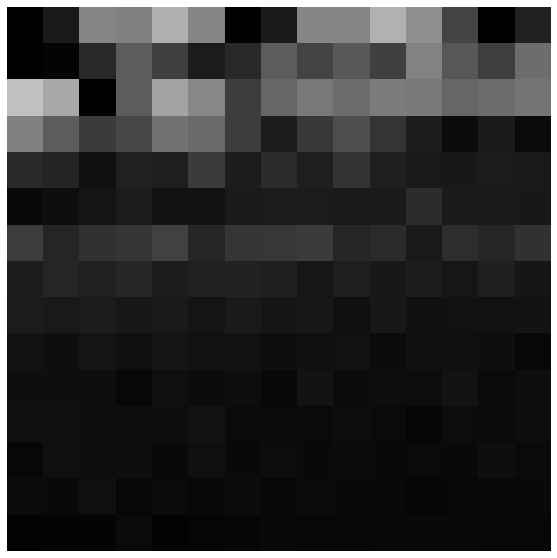

In [ ]:
show_image(linear_transformation(mean_aggregated_array, (15, 15)))

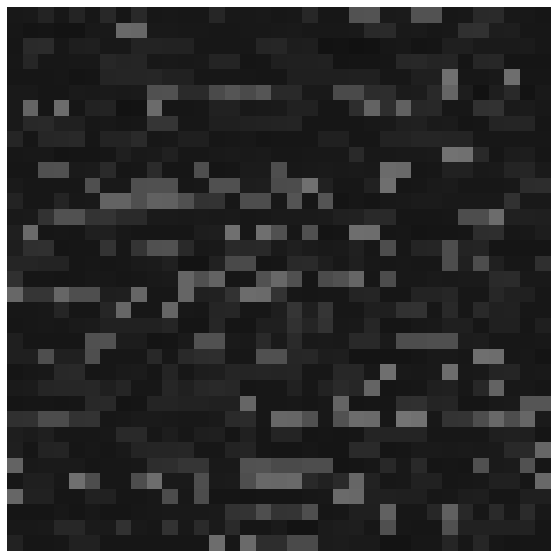

In [ ]:
show_image(linear_transformation(mean_aggregated_array2, (35, 35)))

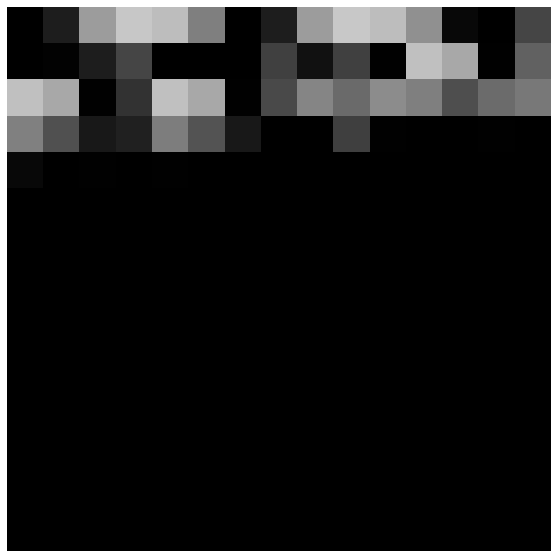

In [ ]:
show_image(linear_transformation(median_aggregated_array, (15, 15)))

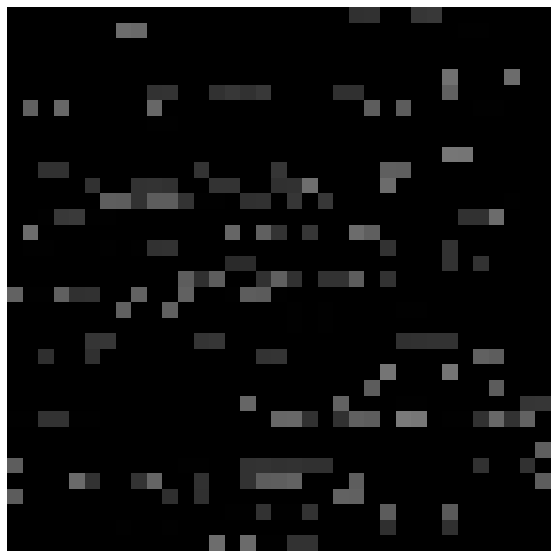

In [ ]:
show_image(linear_transformation(median_aggregated_array2, (35, 35)))

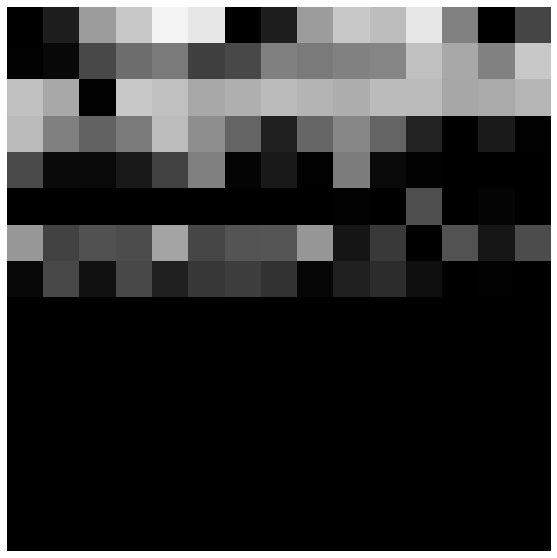

In [ ]:
show_image(linear_transformation(percentile_aggregated_array, (15, 15)))

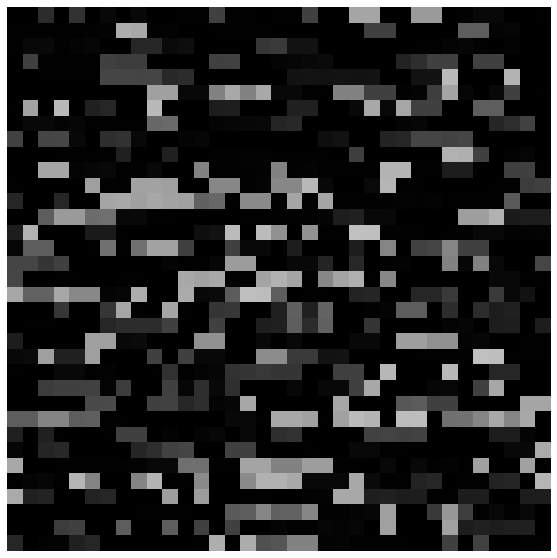

In [ ]:
show_image(linear_transformation(percentile_aggregated_array2, (35, 35)))

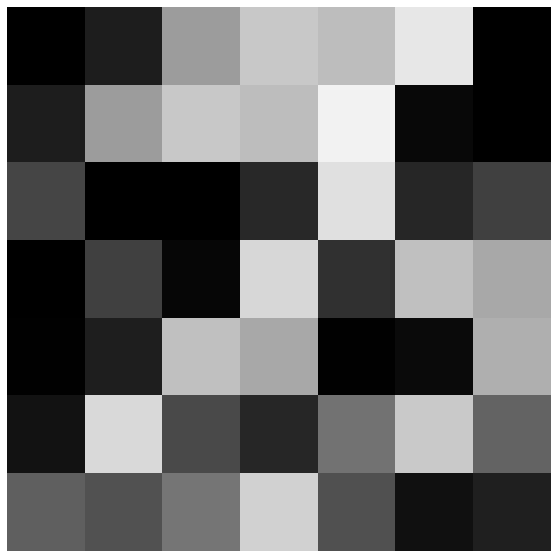

In [ ]:
show_image(linear_transformation(packet_array[:49], (7, 7)))

In [ ]:
len(pl)

1000000

In [ ]:
np.array(pl)

array([ 86,  90, 128, ...,  74,  78,  74])

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
fig = plt.figure(figsize=(15, 10))
p = sns.kdeplot(pl, log_scale=True)

NameError: ignored

[(40.0, 150.0)]

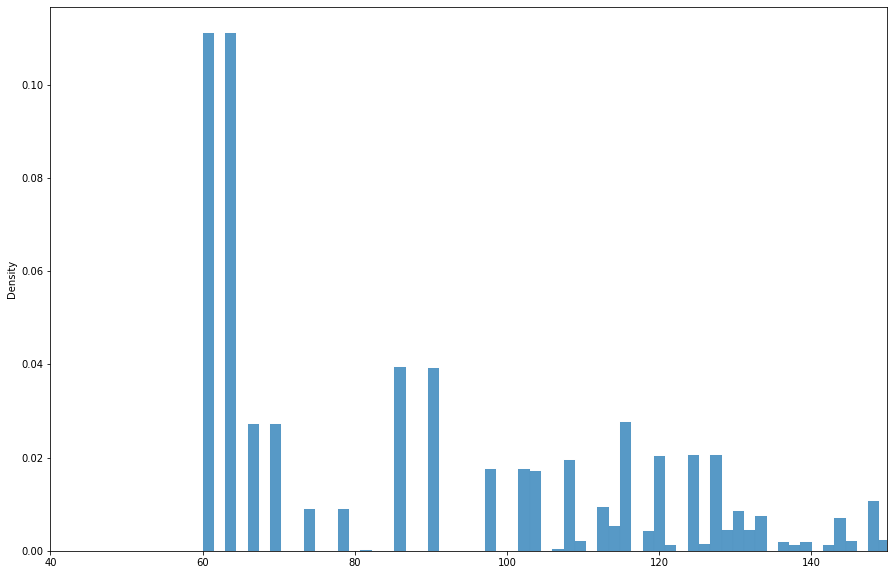

In [ ]:
fig = plt.figure(figsize=(15, 10))
p = sns.histplot(pl, bins=10000, stat='density')
p.set(xlim=(40, 150))

[(40.0, 150.0)]

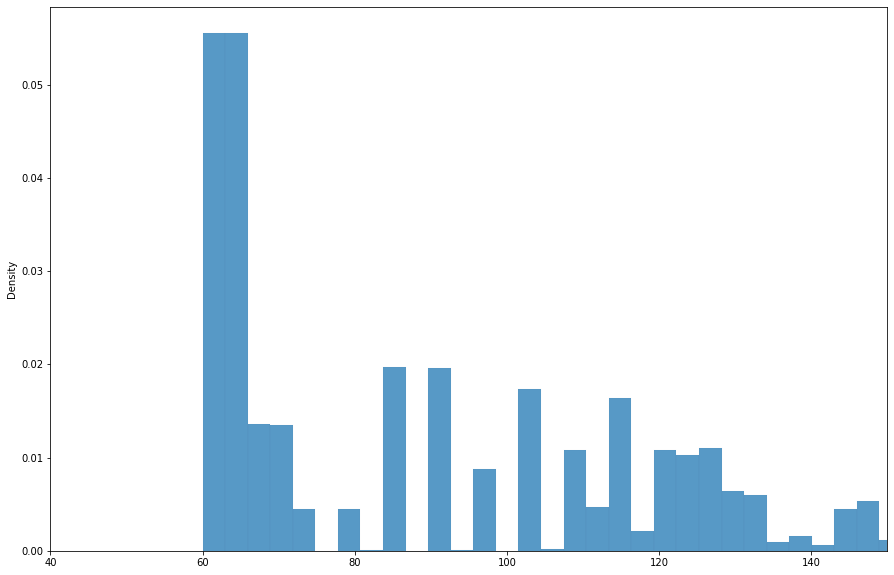

In [ ]:
fig = plt.figure(figsize=(15, 10))
p = sns.histplot(pl, bins=5000, stat='density')
p.set(xlim=(40, 150))

# Other